In [56]:
import glob
import os
import numpy as np
import tensorflow as tf
from music21 import *
import random
from matplotlib import pyplot as plt
from fractions import Fraction
import json

NUM_PIANO_KEYS = 88
A0_MIDI_OFFSET = 21

In [106]:
notes = []
offsets = []
durations = []
#glob.glob('midi_data/scales/**/*.mid', recursive=True)
#filenames = glob.glob('maestro-v3.0.0/**/*.mid*', recursive=True)
#maestro-v3.0.0\\2008\MIDI-Unprocessed_09_R1_2008_01-05_ORIG_MID--AUDIO_09_R1_2008_wav--3.midi
#G_major.mid
for file in glob.glob('midi_data/**/**/*.mid', recursive=True):
    mid = converter.parse(file)
    notes_to_parse = None
    prev_offset = 0
          
    notes_to_parse = mid.flatten().notes
    
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            arr = np.zeros(NUM_PIANO_KEYS)
            try:
                arr[element.pitch.midi - A0_MIDI_OFFSET] = 1
            except IndexError:
                os.remove(file)
                break
                
        
            notes.append(arr)
            
            durations.append(str(element.quarterLength))
            
            offsets.append(round(float(element.offset - prev_offset), 3))
            prev_offset = element.offset
            
        elif isinstance(element, chord.Chord):
            isFirstNote = True
            for n in element:
                arr = np.zeros(NUM_PIANO_KEYS)
                try:
                    arr[n.pitch.midi - A0_MIDI_OFFSET] = 1
                except IndexError:
                    try:
                        os.remove(file)
                        break
                    except FileNotFoundError:
                        break
                    
                notes.append(arr)
                
                durations.append(str(n.quarterLength))
                
                if isFirstNote:
                    offsets.append(round(float(element.offset - prev_offset), 3))
                    prev_offset = element.offset
                    isFirstNote = False
                else:
                    offsets.append(float(0))

notes = np.asarray(notes)
len(notes)

96879

In [126]:
offset_map = dict()
with open('mappings/offset_map.txt') as f:
    for line in f:
        key, value = line.strip().split(":")
        offset_map[float(key)] = int(value)
with open('mappings/duration_map.txt') as json_file:
    duration_map = json.load(json_file)  
with open('mappings/reverse_duration.txt') as f:
    for line in f:
        key, value = line.strip().split(":")
        reverse_duration[int(key)] = value
reverse_offset = dict()
with open('mappings/reverse_offset.txt') as f:
    for line in f:
        key, value = line.strip().split(":")
        reverse_offset[int(key)] = float(value)

In [111]:
duration_map

{'0.0': 0,
 '0.25': 1,
 '0.5': 2,
 '0.75': 3,
 '1.0': 4,
 '1.25': 5,
 '1.5': 6,
 '1.75': 7,
 '1/12': 8,
 '1/3': 9,
 '1/6': 10,
 '10/3': 11,
 '11/12': 12,
 '11/3': 13,
 '11/6': 14,
 '13/12': 15,
 '13/6': 16,
 '17/12': 17,
 '17/6': 18,
 '19/12': 19,
 '19/6': 20,
 '2.0': 21,
 '2.25': 22,
 '2.5': 23,
 '2.75': 24,
 '2/3': 25,
 '23/12': 26,
 '23/6': 27,
 '25/12': 28,
 '29/12': 29,
 '3.0': 30,
 '3.25': 31,
 '3.5': 32,
 '3.75': 33,
 '31/12': 34,
 '35/12': 35,
 '37/12': 36,
 '4.0': 37,
 '4.25': 38,
 '4/3': 39,
 '41/12': 40,
 '43/12': 41,
 '47/12': 42,
 '5/12': 43,
 '5/3': 44,
 '5/6': 45,
 '7/12': 46,
 '7/3': 47,
 '7/6': 48,
 '8/3': 49}

In [112]:
offset_map

{0.0: 0,
 0.083: 1,
 0.167: 2,
 0.25: 3,
 0.333: 4,
 0.417: 5,
 0.5: 6,
 0.583: 7,
 0.667: 8,
 0.75: 9,
 0.833: 10,
 0.917: 11,
 1.0: 12,
 1.083: 13,
 1.167: 14,
 1.25: 15,
 1.333: 16,
 1.417: 17,
 1.5: 18,
 1.583: 19,
 1.667: 20,
 1.75: 21,
 1.833: 22,
 1.917: 23,
 2.0: 24,
 2.083: 25,
 2.167: 26,
 2.25: 27,
 2.333: 28,
 2.417: 29,
 2.5: 30,
 2.583: 31,
 2.667: 32,
 2.75: 33,
 2.833: 34,
 2.917: 35,
 3.0: 36,
 3.083: 37,
 3.167: 38,
 3.25: 39,
 3.333: 40,
 3.417: 41,
 3.5: 42,
 3.583: 43,
 3.667: 44,
 3.75: 45,
 3.833: 46,
 3.917: 47,
 4.0: 48,
 4.083: 49,
 4.167: 50,
 4.25: 51,
 4.333: 52,
 4.417: 53,
 4.5: 54,
 4.583: 55,
 4.667: 56,
 4.75: 57,
 4.833: 58,
 4.917: 59,
 5.0: 60,
 5.083: 61,
 5.167: 62,
 5.25: 63,
 5.333: 64,
 5.417: 65,
 5.5: 66,
 5.583: 67,
 5.667: 68,
 5.75: 69,
 5.833: 70,
 5.917: 71,
 6.0: 72,
 6.083: 73,
 6.167: 74,
 6.25: 75,
 6.333: 76,
 6.417: 77,
 6.5: 78,
 6.583: 79,
 6.667: 80,
 6.75: 81,
 6.833: 82,
 6.917: 83,
 7.0: 84,
 7.083: 85,
 7.167: 86,
 7.25: 87,

In [113]:
temp = []
size = len(duration_map)
for duration in durations:
    arr = np.zeros(size)
    arr[duration_map[duration]] = 1
    temp.append(arr)
durations = np.asarray(temp)

In [115]:
temp = []
size = len(offset_map)
for offset in offsets:
    arr = np.zeros(size)
    try:
        arr[offset_map[offset]] = 1
    except IndexError:
        print(offset, offset_map[offset])
        print(arr[offset_map[offset]])
    temp.append(arr)
offsets = np.asarray(temp)

In [116]:
notes.shape

(96879, 88)

In [117]:
durations.shape

(96879, 50)

In [118]:
offsets.shape

(96879, 235)

In [119]:
train_notes = np.concatenate([notes, durations, offsets], axis = 1)

seq_length = 50
inputs = []
note_outputs = []
duration_outputs = []
offset_outputs = []
for i in range(len(notes) - seq_length):
    inputs.append(train_notes[i : i + seq_length])
    
    note_outputs.append(notes[i + seq_length])
    duration_outputs.append(durations[i + seq_length])
    offset_outputs.append(offsets[i + seq_length])
    
input_size = len(inputs)
inputs = np.asarray(inputs)
inputs.reshape(input_size, seq_length, len(train_notes[0]))

note_outputs = np.asarray(note_outputs)
duration_outputs = np.asarray(duration_outputs)
offset_outputs = np.asarray(offset_outputs)

In [121]:
input_shape = inputs[0].shape
learning_rate = 0.005

inp = tf.keras.Input(input_shape)
lstm = tf.keras.layers.LSTM(512)(inp)
drop = tf.keras.layers.Dropout(0.25)(lstm)
dense = tf.keras.layers.Dense(128)(drop)
out = {
    "pitch": tf.keras.layers.Dense(NUM_PIANO_KEYS, name = "pitch", activation = "softmax")(dense),
    "duration": tf.keras.layers.Dense(len(duration_map), name = "duration", activation = "softmax")(dense),
    "offset": tf.keras.layers.Dense(len(offset_map), name = "offset", activation = "softmax")(dense),
}

model = tf.keras.Model(inp, out)

model.compile(
    loss = "categorical_crossentropy",
    loss_weights = {
        'pitch': 1.0,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate),
    metrics = ["accuracy"]
)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 50, 373)]            0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 512)                  1814528   ['input_4[0][0]']             
                                                                                                  
 dropout_3 (Dropout)         (None, 512)                  0         ['lstm_3[0][0]']              
                                                                                                  
 dense_3 (Dense)             (None, 128)                  65664     ['dropout_3[0][0]']           
                                                                                            

In [122]:
%%time
epochs = 25

history = model.fit(
    x = inputs,
    y = {"pitch": note_outputs, "duration": duration_outputs, "offset": offset_outputs},
    epochs = epochs,
    callbacks = tf.keras.callbacks.EarlyStopping(
        monitor = 'loss',
        patience = 5,
        verbose = 1,
        restore_best_weights = True),
    validation_split = 0.2
)

Epoch 1/25
2421/2421 [==============================] - 336s 139ms/step - loss: 3.1025 - duration_loss: 0.0025 - offset_loss: 0.1479 - pitch_loss: 2.9522 - duration_accuracy: 0.9996 - offset_accuracy: 0.9394 - pitch_accuracy: 0.2118 - val_loss: 2.0244 - val_duration_loss: 1.5374e-05 - val_offset_loss: 0.2095 - val_pitch_loss: 1.8149 - val_duration_accuracy: 1.0000 - val_offset_accuracy: 0.8879 - val_pitch_accuracy: 0.4245
Epoch 2/25
2421/2421 [==============================] - 333s 138ms/step - loss: 2.3836 - duration_loss: 1.3386e-04 - offset_loss: 0.0335 - pitch_loss: 2.3500 - duration_accuracy: 1.0000 - offset_accuracy: 0.9873 - pitch_accuracy: 0.3108 - val_loss: 1.6467 - val_duration_loss: 1.9716e-05 - val_offset_loss: 0.0925 - val_pitch_loss: 1.5542 - val_duration_accuracy: 1.0000 - val_offset_accuracy: 0.9505 - val_pitch_accuracy: 0.5208
Epoch 3/25
2421/2421 [==============================] - 332s 137ms/step - loss: 2.2184 - duration_loss: 8.4288e-05 - offset_loss: 0.0242 - pitch

2421/2421 [==============================] - 345s 143ms/step - loss: 5.0314 - duration_loss: 2.7453e-04 - offset_loss: 0.6432 - pitch_loss: 4.3879 - duration_accuracy: 0.9999 - offset_accuracy: 0.7027 - pitch_accuracy: 0.0522 - val_loss: 5.1665 - val_duration_loss: 3.0901e-09 - val_offset_loss: 1.0125 - val_pitch_loss: 4.1539 - val_duration_accuracy: 1.0000 - val_offset_accuracy: 0.6907 - val_pitch_accuracy: 0.0633
Epoch 20: early stopping
CPU times: user 6h 46min 22s, sys: 1h 41min 5s, total: 8h 27min 28s
Wall time: 1h 53min 41s


In [125]:
model.save_weights("weights/jazznet")
model.weights

[<tf.Variable 'lstm_3/lstm_cell/kernel:0' shape=(373, 2048) dtype=float32, numpy=
 array([[-0.02549937, -0.02157745,  0.04676175, ..., -0.00208347,
          0.0109541 ,  0.03197775],
        [ 0.0097643 , -0.02284117,  0.00407151, ...,  0.03663059,
         -0.00645186,  0.03012   ],
        [-0.02757075, -0.02471986, -0.00685724, ..., -0.04264772,
          0.03959554, -0.04600886],
        ...,
        [-0.0039024 ,  0.00626381, -0.00258368, ...,  0.02822074,
          0.01161296,  0.01594645],
        [ 0.00987686,  0.04430768,  0.00975126, ...,  0.00523633,
         -0.04047171, -0.0285727 ],
        [ 0.01109227,  0.03107528,  0.03501086, ...,  0.01149857,
          0.04023383,  0.03131195]], dtype=float32)>,
 <tf.Variable 'lstm_3/lstm_cell/recurrent_kernel:0' shape=(512, 2048) dtype=float32, numpy=
 array([[ 0.19703622,  1.8791293 , -0.6187147 , ...,  0.417162  ,
          0.28270516,  0.1432458 ],
        [-0.90168023,  1.7376618 ,  0.7338706 , ...,  1.5522743 ,
         -0.002

In [50]:
model2 = tf.keras.Model(inp, out)
model2.compile(
    loss = "categorical_crossentropy",
    loss_weights = {
        'pitch': 1.0,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    metrics = ["accuracy"]
)
model2.load_weights("jazznet_weights")
model2.weights

[<tf.Variable 'lstm/lstm_cell/kernel:0' shape=(93, 2048) dtype=float32, numpy=
 array([[-9.99477133e-03,  3.16957608e-02, -3.76444310e-03, ...,
         -3.15231718e-02,  2.27728561e-02, -4.73803282e-02],
        [-1.24382600e-03,  3.54190692e-02, -4.00600955e-02, ...,
         -2.93151215e-02, -4.50414047e-02, -3.65166888e-02],
        [ 3.70004699e-02,  5.00074327e-02, -4.49121520e-02, ...,
          5.07167205e-02, -4.06463072e-02,  3.83287072e-02],
        ...,
        [-6.96782351e-01,  4.65769172e-01, -1.02721535e-01, ...,
         -2.38315940e+00, -1.03030479e+00, -3.28958899e-01],
        [ 5.39469957e-01, -2.33501747e-01, -2.71207452e+00, ...,
         -4.30149674e-01, -1.27566457e+00, -1.34587276e+00],
        [-9.42528486e-01, -7.68268585e-01, -5.62174439e-01, ...,
         -1.29556191e+00,  1.25285411e+00, -5.12665868e-01]], dtype=float32)>,
 <tf.Variable 'lstm/lstm_cell/recurrent_kernel:0' shape=(512, 2048) dtype=float32, numpy=
 array([[-1.6226577 ,  0.923351  , -0.913716

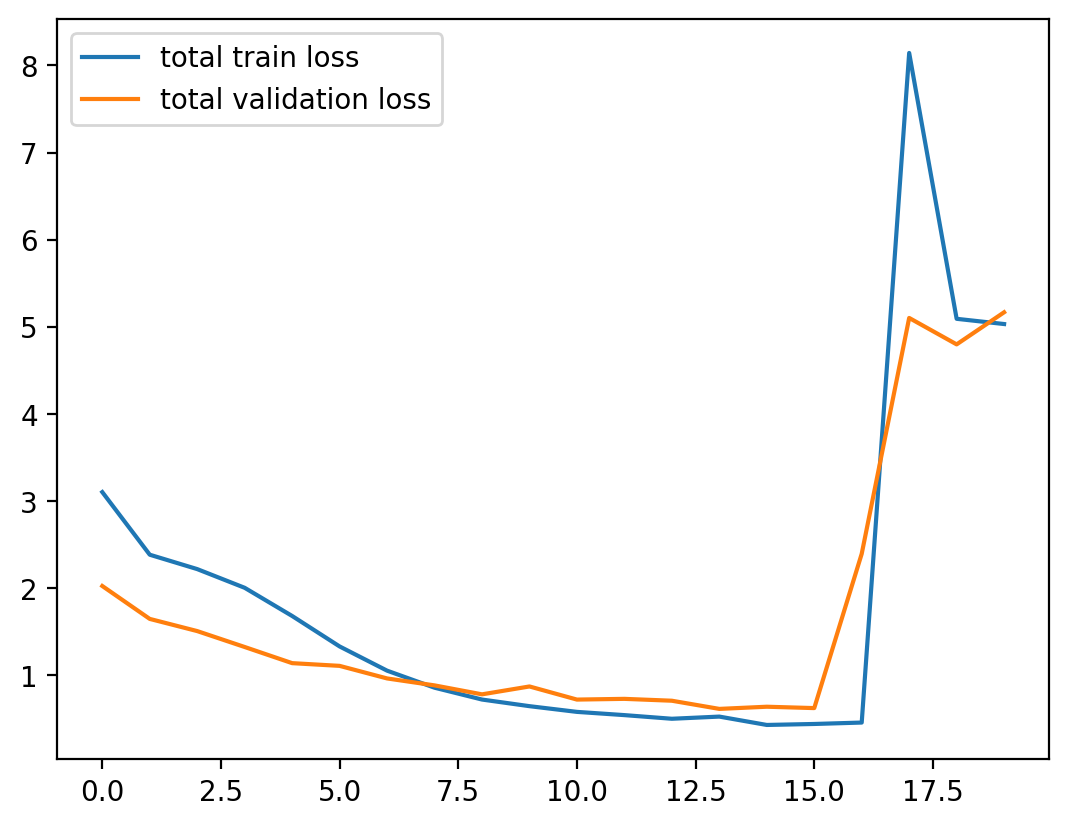

In [127]:
plt.plot(history.epoch, history.history['loss'], label='total train loss')
plt.plot(history.epoch, history.history['val_loss'], label='total validation loss')
plt.legend()
plt.show()

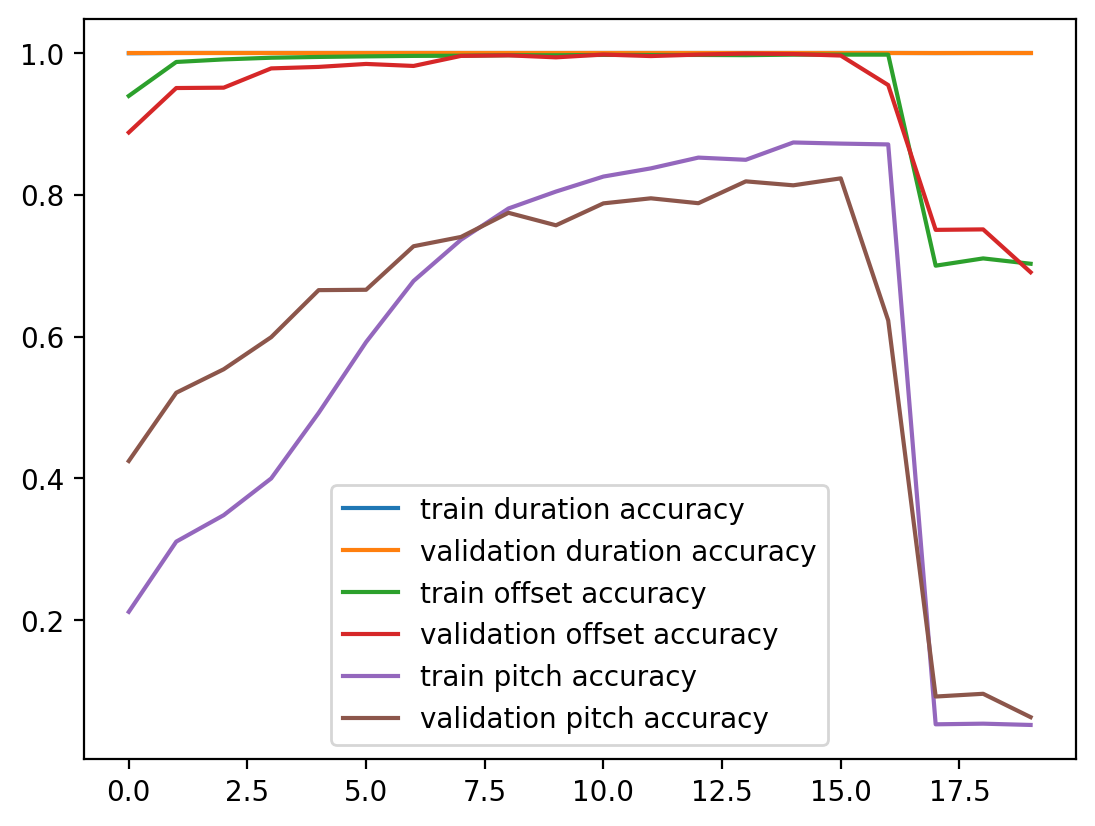

In [128]:
plt.plot(history.epoch, history.history['duration_accuracy'], label='train duration accuracy')
plt.plot(history.epoch, history.history['val_duration_accuracy'], label='validation duration accuracy')

plt.plot(history.epoch, history.history['offset_accuracy'], label='train offset accuracy')
plt.plot(history.epoch, history.history['val_offset_accuracy'], label='validation offset accuracy')

plt.plot(history.epoch, history.history['pitch_accuracy'], label='train pitch accuracy')
plt.plot(history.epoch, history.history['val_pitch_accuracy'], label='validation pitch accuracy')

plt.legend()
plt.show()

In [129]:
num_notes = 100
seed_notes = inputs[0]
chord_builder = []
note_stream = []
offset = 0

for g in reversed(seed_notes):
    n = note.Note(np.argmax(g[:NUM_PIANO_KEYS]) + A0_MIDI_OFFSET)
    str_duration = reverse_duration[np.argmax(g[NUM_PIANO_KEYS : NUM_PIANO_KEYS + len(duration_map)])]
    try:
        n.quarterLength = float(str_duration)
    except:
        n.quarterLength = Fraction(str_duration)
    offset = reverse_offset[np.argmax(g[-1 * len(offset_map):])]
    if offset == 0:
        chord_builder.append(n)
    elif len(chord_builder) == 0:
        note_stream.append((n, offset))
    else:
        note_stream.append((chord.Chord(chord_builder), offset))
        chord_builder = []
if len(chord_builder) == 1:
    note_stream.append((chord_builder[0], 0))
elif len(chord_builder) > 1:
    note_stream.append((chord.Chord(chord_builder), 0))
note_stream.reverse()

In [130]:
seed_stream = stream.Stream()
previous_offset = 0
for n, off in note_stream:
    previous_offset += off
    seed_stream.insert(previous_offset, n)

In [131]:
generated_notes = []
for i in range(num_notes):
    new_note = model.predict(tf.expand_dims(seed_notes, 0))
    new_input = np.concatenate([new_note["pitch"], new_note["duration"], new_note["offset"]], axis = 1)
    generated_notes.append(new_note)
    seed_notes = np.delete(seed_notes, 0, axis = 0)
    seed_notes = np.append(seed_notes, new_input, axis = 0)

1/1 [==============================] - 0s 14ms/step


In [132]:
chord_builder = []
note_stream = []
offset = 0
for i in reversed(range(len(generated_notes))):
    g = generated_notes[i]
    n = note.Note(np.argmax(g["pitch"]) + A0_MIDI_OFFSET)
    try:
        n.quarterLength = float(reverse_duration[np.argmax(g["duration"])])
    except:
        n.quarterLength = Fraction(reverse_duration[np.argmax(g["duration"])])
    offset = reverse_offset[np.argmax(g["offset"])]
    if offset == 0:
        chord_builder.append(n)
    elif len(chord_builder) == 0:
        note_stream.append((n, offset))
    else:
        note_stream.append((chord.Chord(chord_builder), offset))
        chord_builder = []
if len(chord_builder) == 1:
    note_stream.append((chord_builder[0], 0))
elif len(chord_builder) > 1:
    note_stream.append((chord.Chord(chord_builder), 0))
note_stream.reverse()

In [133]:
s = stream.Stream()
previous_offset = 0
for n, off in note_stream:
    previous_offset += off
    s.insert(previous_offset, n)

In [134]:
seed_stream.write("midi", "seed.mid")

'seed.mid'

In [135]:
seed_stream.show("midi")

In [136]:
s.write("midi", "output.mid")

'output.mid'

In [137]:
s.show("midi")

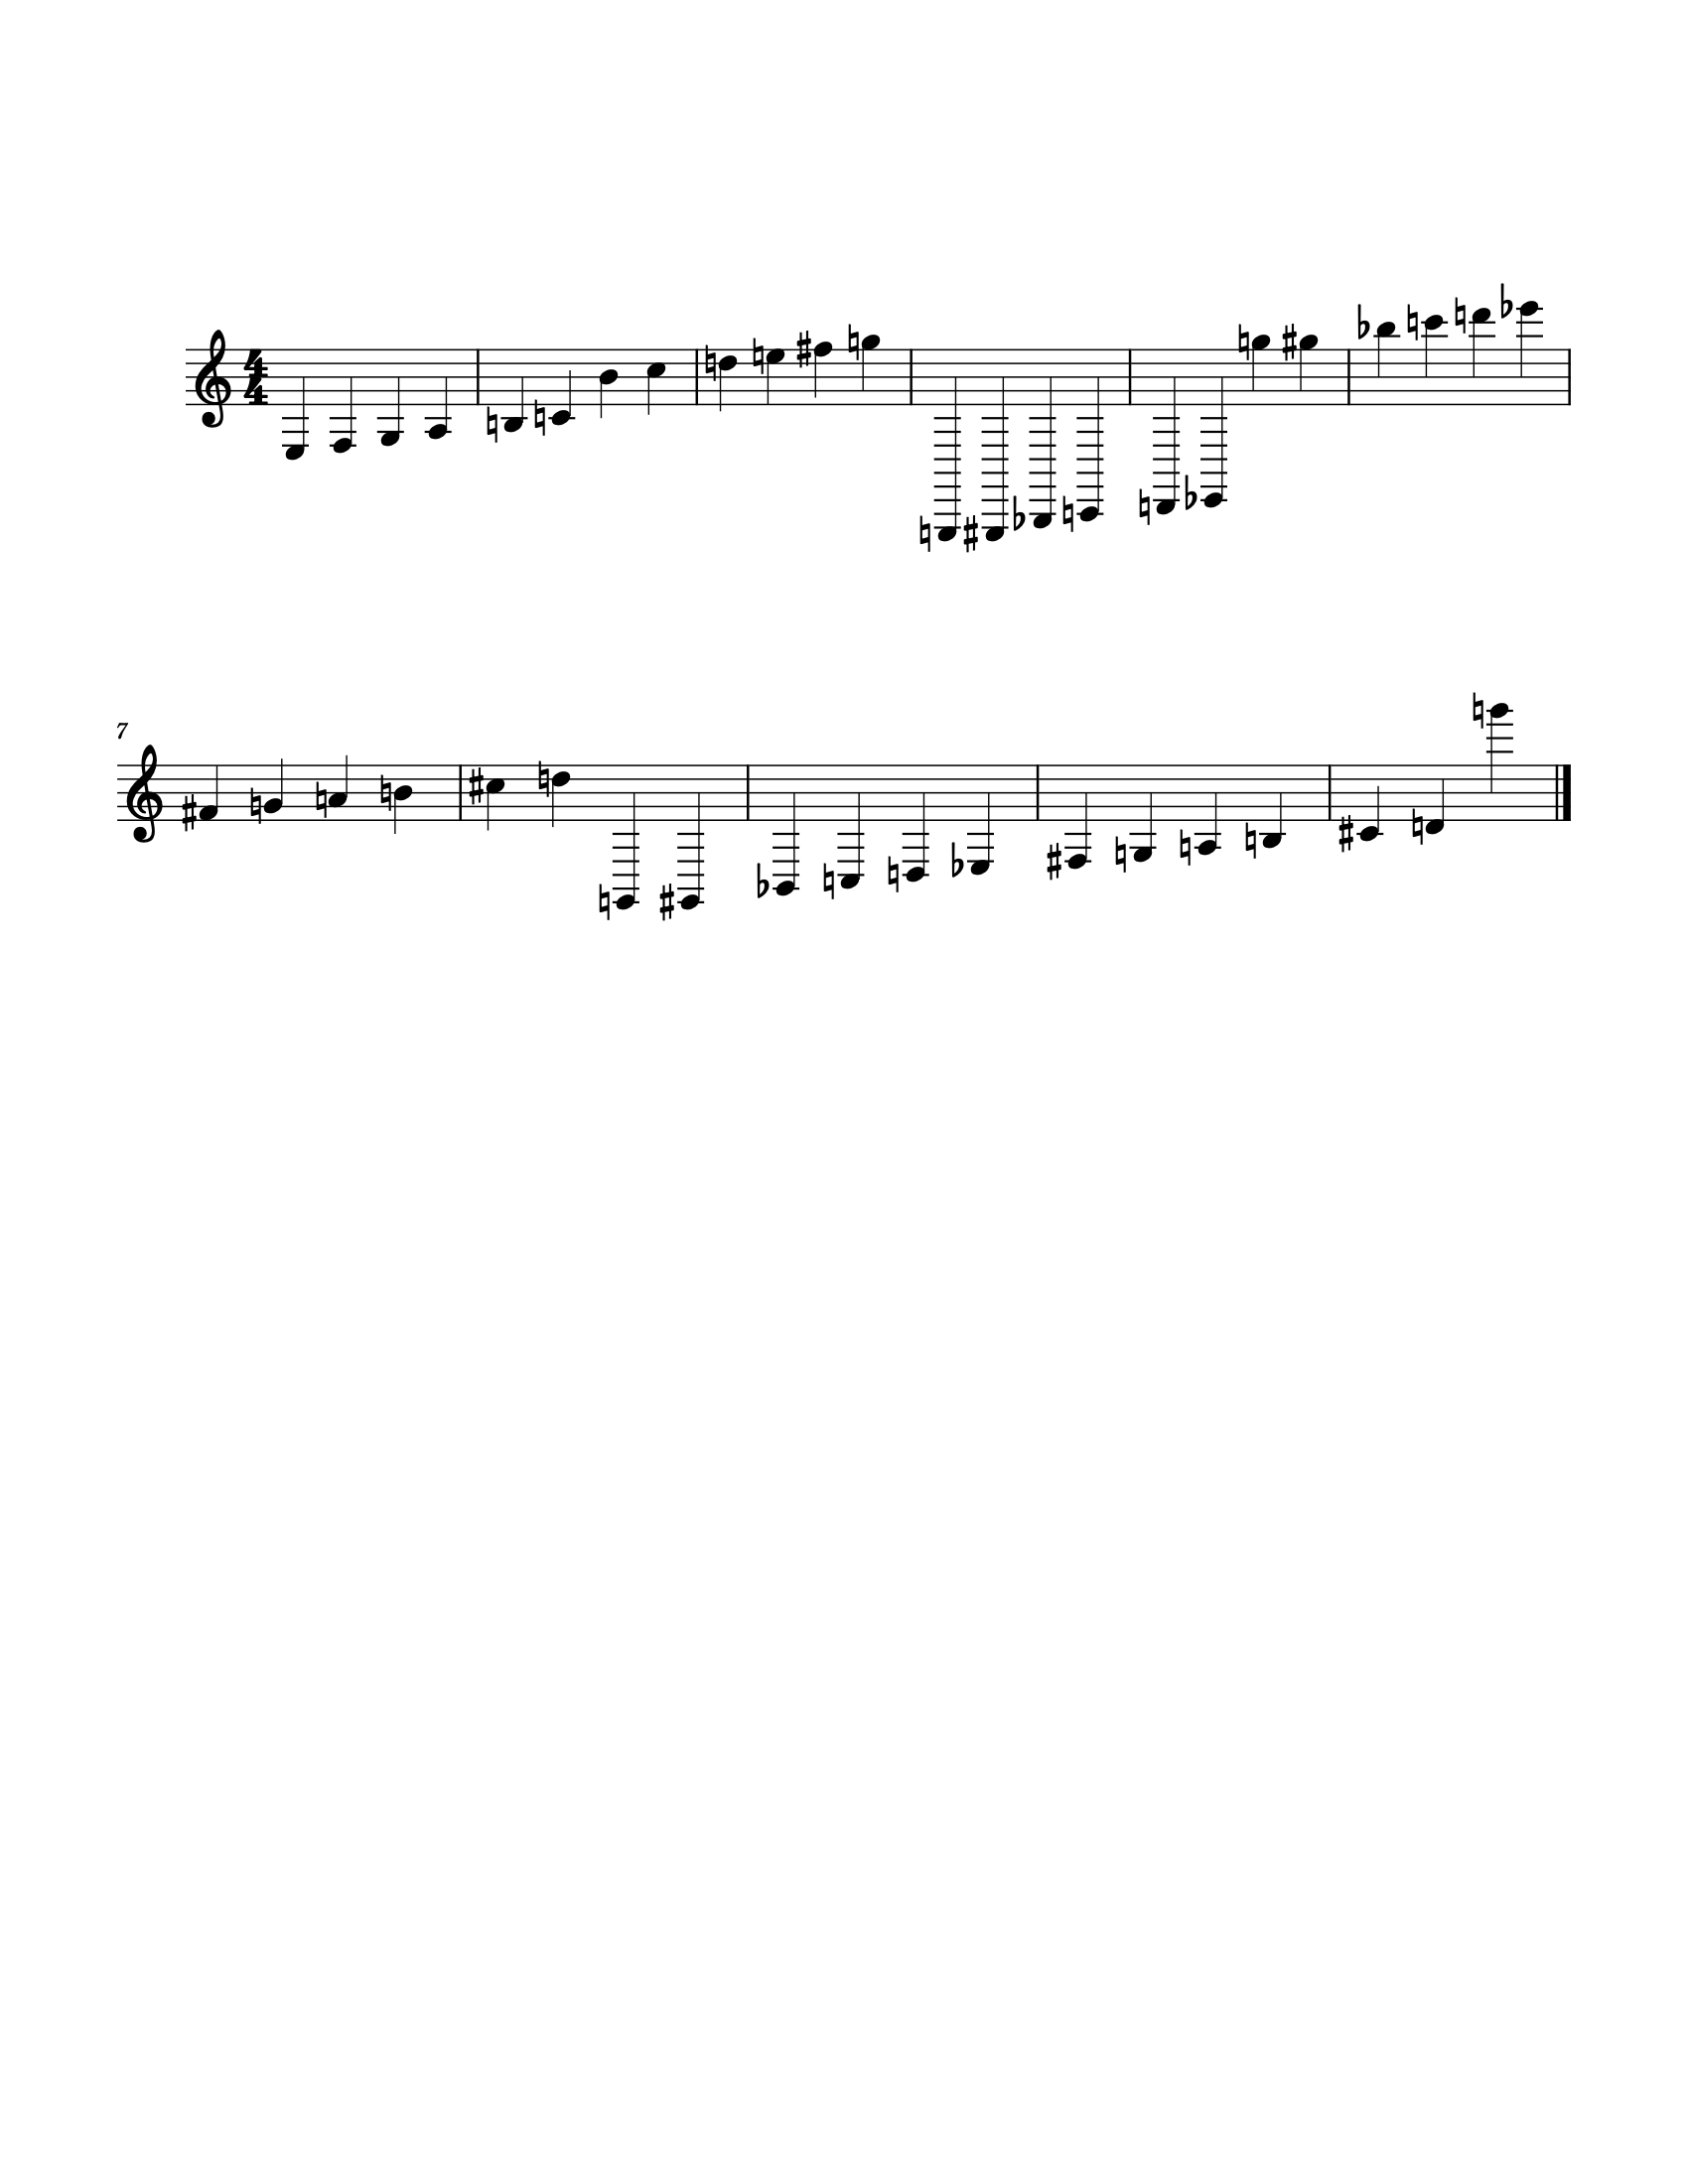

In [40]:
seed_stream.show()

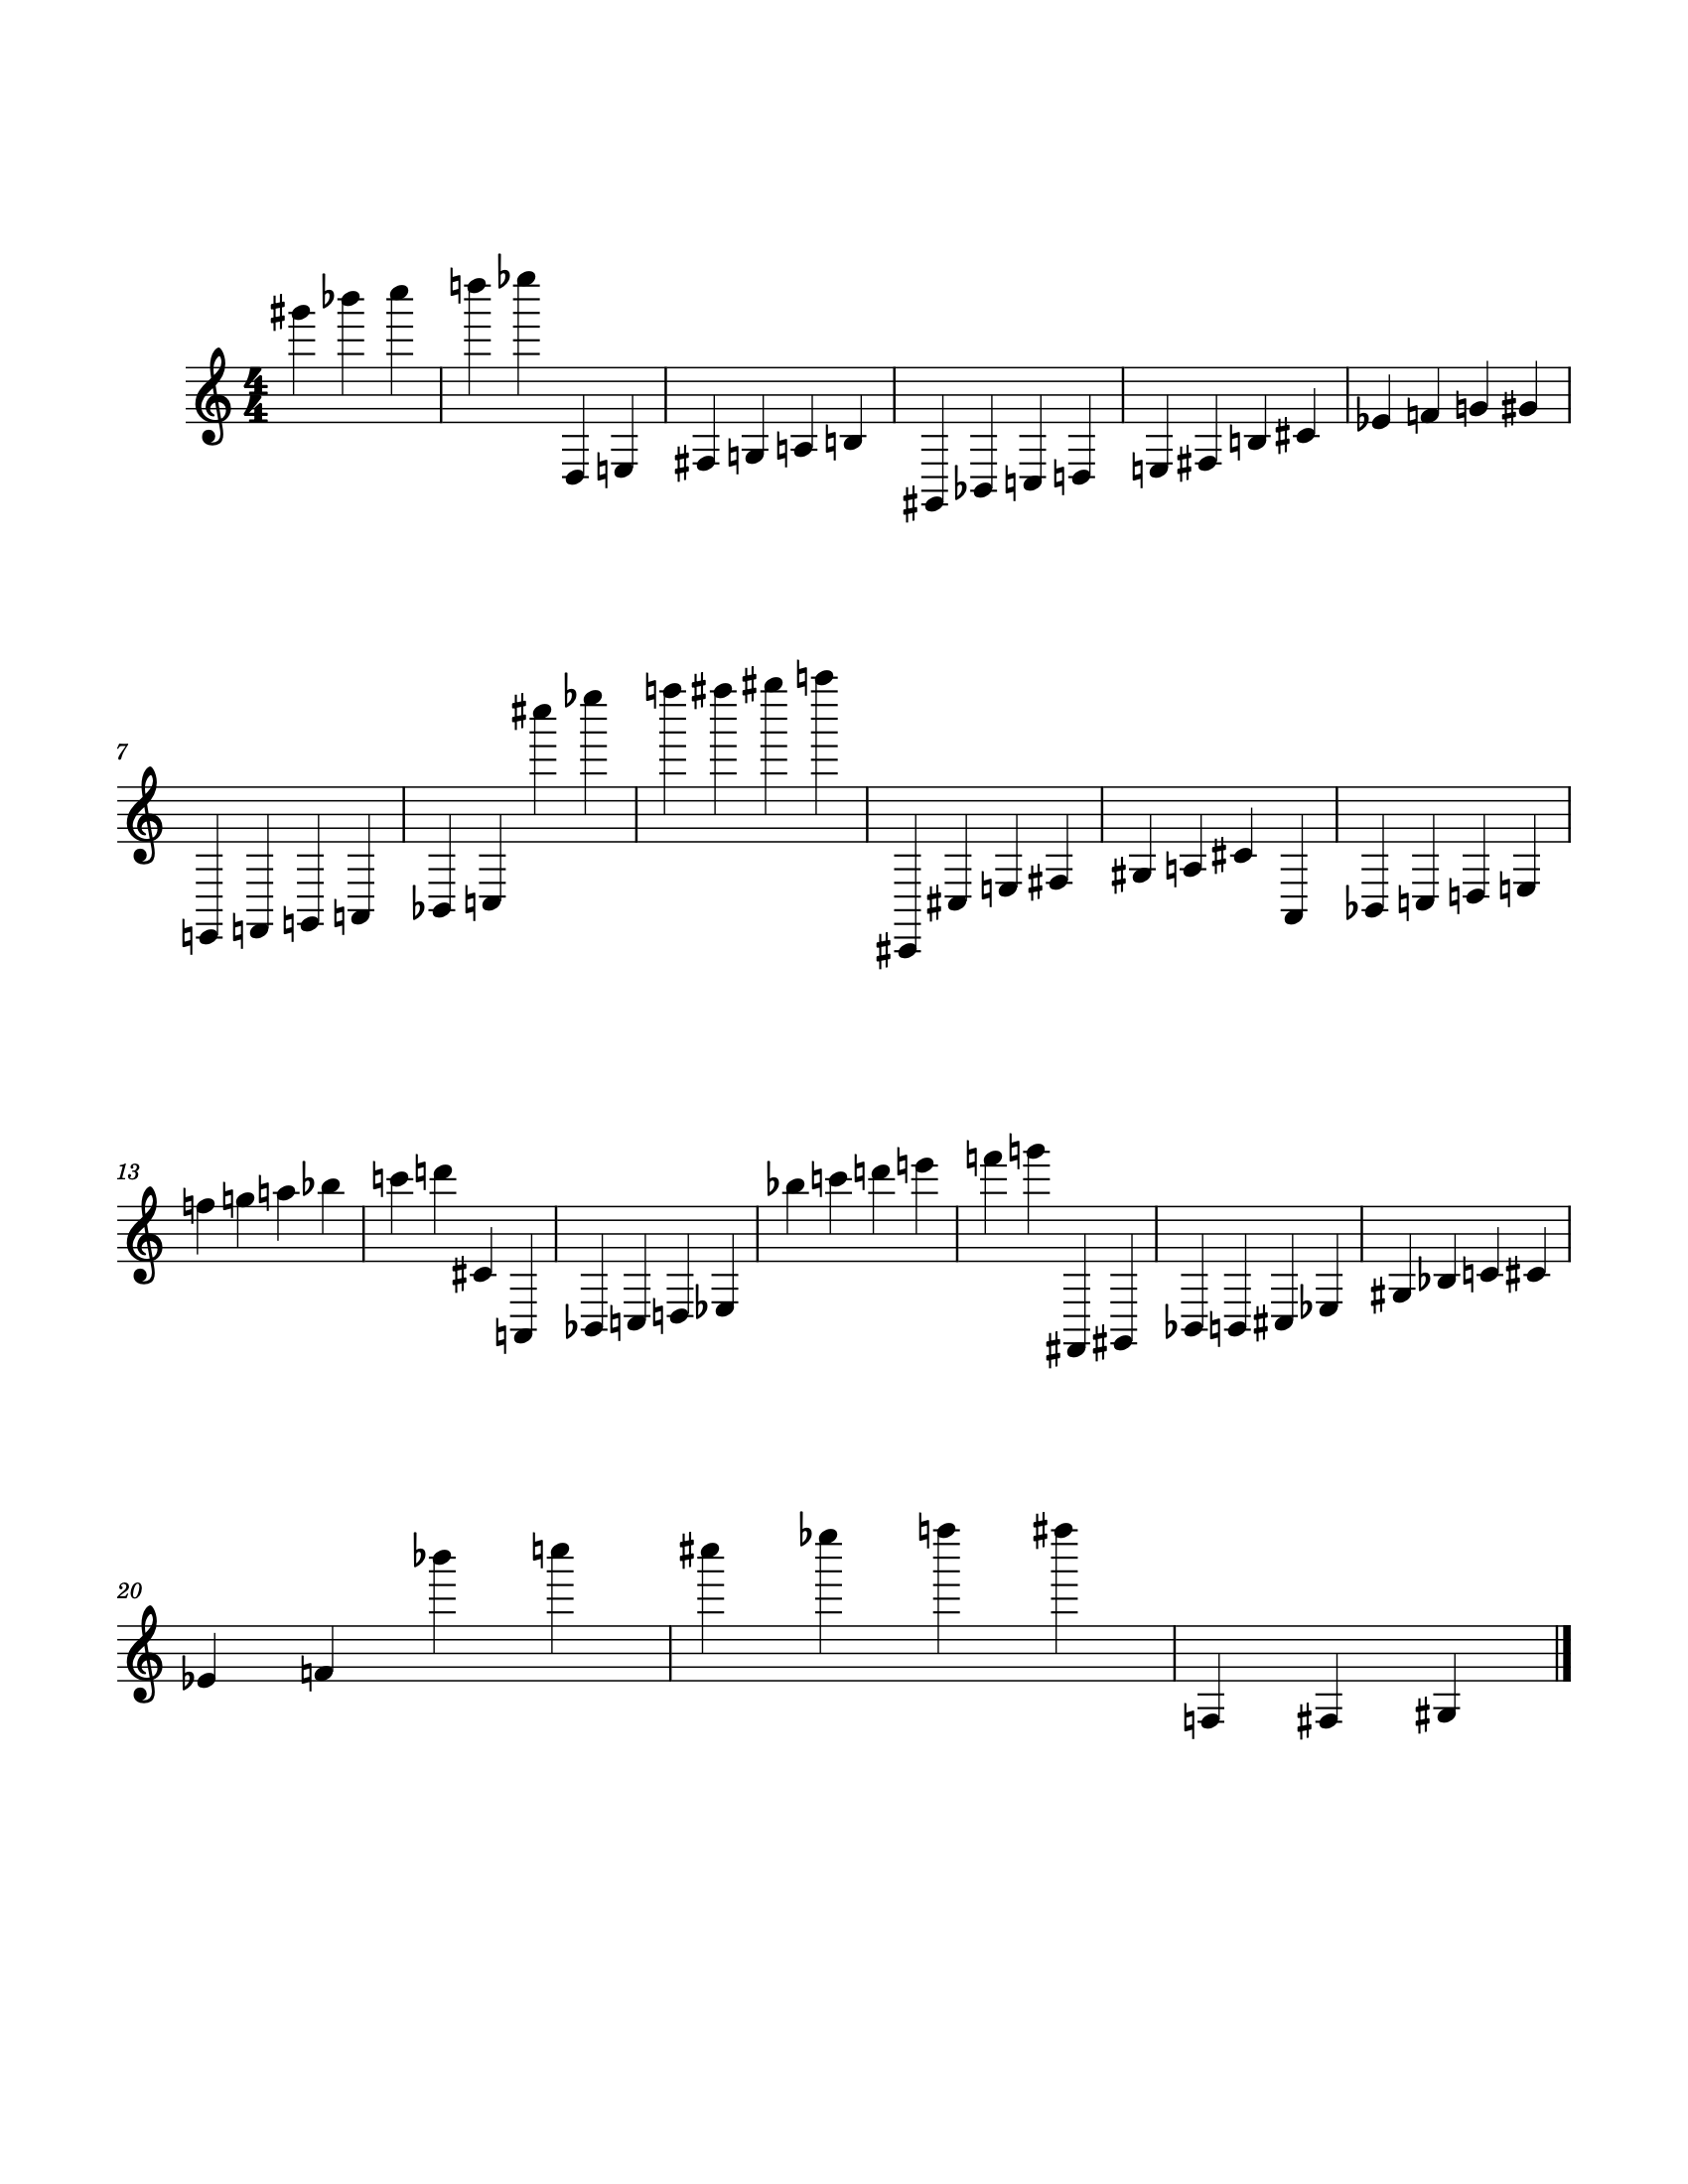

In [41]:
s.show()